# Import Libraries

In [18]:

import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
import os

from sklearn.model_selection import train_test_split

print(os.listdir("input"))

['olivetti_faces.npy', 'olivetti_faces_target.npy']


# Import Data

In [19]:

pics = np.load("input/olivetti_faces.npy")
labels = np.load("input/olivetti_faces_target.npy")


In [20]:
print("pics: ", pics.shape)
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


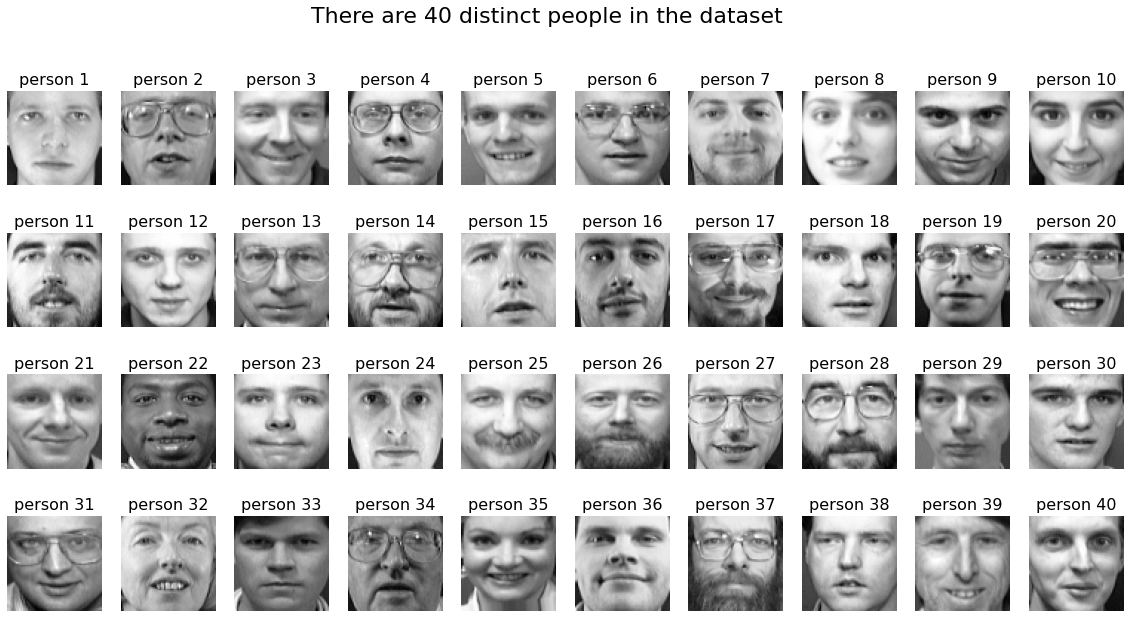

In [21]:

fig = plt.figure(figsize=(20, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = pics[10*(i-1),:,:]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap = plt.get_cmap('gray'))
    plt.title("person {}".format(i), fontsize=16)
    plt.axis('off')
    
plt.suptitle("There are 40 distinct people in the dataset", fontsize=22)
plt.show()



In [22]:
Xdata = pics # store images in Xdata
Ydata = labels.reshape(-1,1) # store labels in Ydata

# Split data for train and test purposes

In [23]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xdata, Ydata, test_size = 0.2, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


x_train:  (320, 64, 64)
x_test:  (80, 64, 64)
y_train:  (320, 1)
y_test:  (80, 1)


# Reshape

In [24]:

x_train = x_train.reshape(-1,64,64,1)
x_test = x_test.reshape(-1,64,64,1)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)

x_train:  (320, 64, 64, 1)
x_test:  (80, 64, 64, 1)


# Convolutional Neural Network (CNN)

# Reshape for CNN

In [26]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

y_train_ = to_categorical(y_train, num_classes = 40) # 40 distinct people
y_test_ = to_categorical(y_test, num_classes = 40)

print("y_train_ shape: ",y_train_.shape)
print("y_test_ shape: ",y_test_.shape)

y_train_ shape:  (320, 40)
y_test_ shape:  (80, 40)


# CNN training model

In [27]:

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 20, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 50, kernel_size = (6,6),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 150, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (64,64,1)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(40, activation = "softmax"))

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.7, 
                                            min_lr=0.00000000001)

epoch = 37
batch_size = 20

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train)

history = model.fit_generator(
                              datagen.flow(x_train,y_train_, batch_size=batch_size),
                              epochs = epoch, 
                              validation_data = (x_test,y_test_),
                              verbose = 2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction]
                             )

Epoch 1/37
16/16 - 5s - loss: 4.4835 - accuracy: 0.0312 - val_loss: 3.6925 - val_accuracy: 0.0125
Epoch 2/37
16/16 - 4s - loss: 3.6943 - accuracy: 0.0125 - val_loss: 3.6936 - val_accuracy: 0.0250
Epoch 3/37
16/16 - 4s - loss: 3.6893 - accuracy: 0.0156 - val_loss: 3.6948 - val_accuracy: 0.0000e+00
Epoch 4/37
16/16 - 4s - loss: 3.6962 - accuracy: 0.0375 - val_loss: 3.6944 - val_accuracy: 0.0000e+00
Epoch 5/37
16/16 - 4s - loss: 3.6849 - accuracy: 0.0312 - val_loss: 3.6949 - val_accuracy: 0.0000e+00
Epoch 6/37
16/16 - 4s - loss: 3.6982 - accuracy: 0.0437 - val_loss: 3.7077 - val_accuracy: 0.0000e+00
Epoch 7/37
16/16 - 4s - loss: 3.6639 - accuracy: 0.0562 - val_loss: 3.6335 - val_accuracy: 0.0750
Epoch 8/37
16/16 - 4s - loss: 3.5628 - accuracy: 0.1000 - val_loss: 3.3377 - val_accuracy: 0.1500
Epoch 9/37
16/16 - 5s - loss: 3.1715 - accuracy: 0.1969 - val_loss: 2.7432 - val_accuracy: 0.4375
Epoch 10/37
16/16 - 5s - loss: 2.6198 - accuracy: 0.3250 - val_loss: 1.7180 - val_accuracy: 0.6000
Epo

Epoch 33/37
16/16 - 4s - loss: 0.0877 - accuracy: 0.9656 - val_loss: 0.0861 - val_accuracy: 0.9750
Epoch 34/37
16/16 - 4s - loss: 0.1633 - accuracy: 0.9469 - val_loss: 0.0851 - val_accuracy: 0.9750
Epoch 35/37
16/16 - 4s - loss: 0.0801 - accuracy: 0.9781 - val_loss: 0.0839 - val_accuracy: 0.9750
Epoch 36/37
16/16 - 4s - loss: 0.0932 - accuracy: 0.9625 - val_loss: 0.0450 - val_accuracy: 0.9875
Epoch 37/37
16/16 - 4s - loss: 0.1958 - accuracy: 0.9469 - val_loss: 0.0703 - val_accuracy: 0.9875


# Show the  Cnn_accuracy

In [28]:

y_pred = model.predict_classes(x_test)

y_test = y_test.reshape(-1,)

diff = y_test - y_pred
diff = diff.reshape(-1,1)

true = 0
for i in range(0,len(diff)):
    if diff[i] == 0:
        true = true + 1

Cnn_accuracy = round(100*true/len(diff),2)

print("Cnn_accuracy is %", Cnn_accuracy)



Cnn_accuracy is % 98.75
